In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold


from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import xgboost as xgb

%matplotlib inline

In [2]:
df = pd.read_csv('./data/diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# EDA

In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
df.gender.value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [8]:
df.diabetes.value_counts(normalize=True)

0    0.915
1    0.085
Name: diabetes, dtype: float64

In [9]:
df = df[df.gender != "other"]

df.gender.value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [10]:
global_diabetes = df.diabetes.mean()
global_diabetes

0.085

In [11]:
df.smoking_history.value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [12]:
df['smoking_history'] = df['smoking_history'].replace(["no_info"], "never")

In [13]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

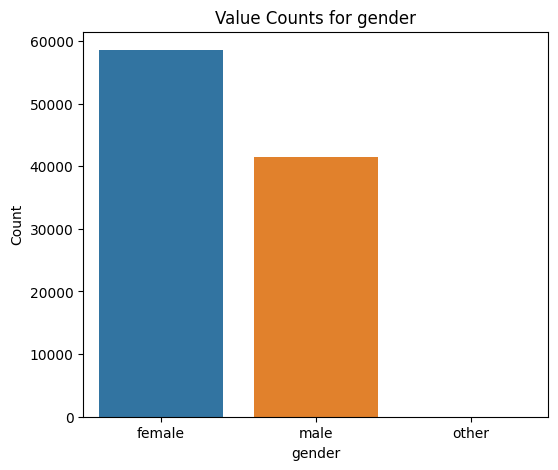

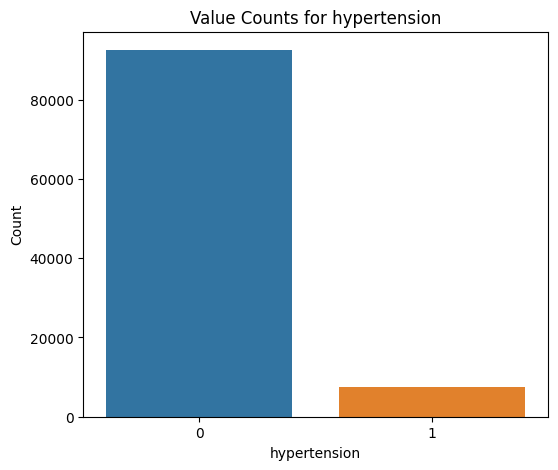

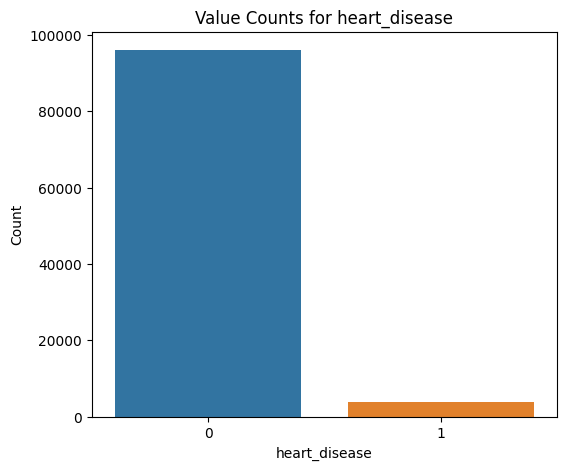

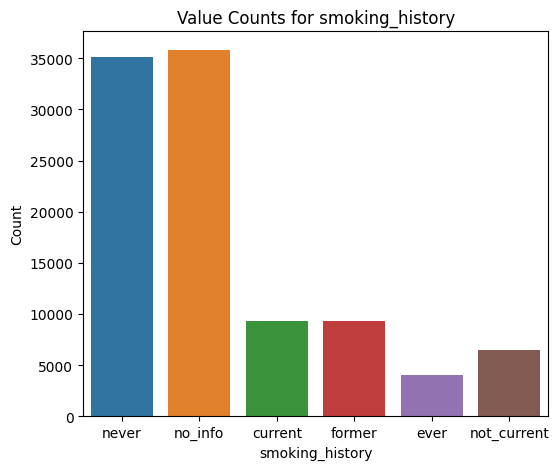

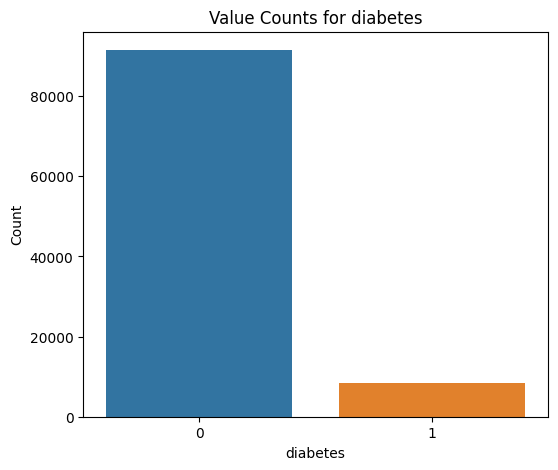

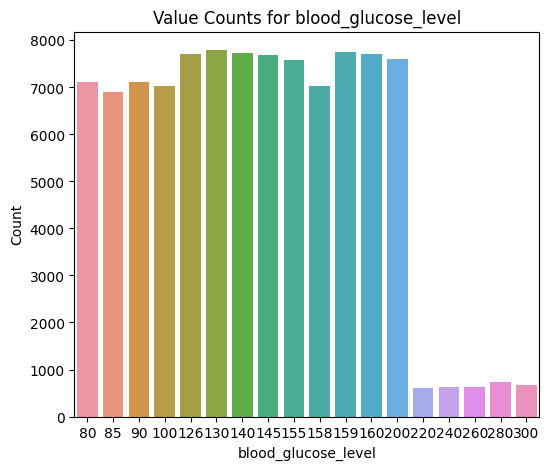

In [14]:
categorical_cols = ["gender", "hypertension", "heart_disease", "smoking_history", "diabetes","blood_glucose_level"]
for col in categorical_cols:
    plt.figure(figsize=(6, 5))
    plt.title(f'Value Counts for {col}')  # Set the title
    sns.countplot(data=df, x=col)  # Create the count plot using Seaborn
    plt.xlabel(col)
    plt.ylabel('Count')  # Set the y-axis label to 'Count'
    plt.show()

In [15]:
df[df.gender == "male"].diabetes.mean()

0.09748974173304369

In [16]:
df[df.gender == "female"].diabetes.mean()

0.0761886869790955

In [17]:
heart_disease_diabetes = df[df.heart_disease == True].diabetes.mean()
heart_disease_diabetes

0.32141045154743786

In [18]:
with_out_heart_disease_diabetes=df[df.heart_disease == False].diabetes.mean()
with_out_heart_disease_diabetes

0.0752982573028795

In [19]:
hyper_tension_diabetes = df[df.hypertension == True].diabetes.mean()
hyper_tension_diabetes

0.27895791583166335

In [20]:
without_hyper_tension_diabetes = df[df.hypertension == False].diabetes.mean()
without_hyper_tension_diabetes

0.06930767983570232

In [21]:
df[df.smoking_history == "no_info"].diabetes.value_counts()

0    34362
1     1454
Name: diabetes, dtype: int64

 **Risk Ratio**

In [22]:
hyper_tension_diabetes/ global_diabetes

3.281857833313686

In [23]:
heart_disease_diabetes / global_diabetes

3.781299429969857

In [24]:
from IPython.display import display

In [25]:
categorical_column = ["gender", "hypertension", "heart_disease", "smoking_history"]
for c in categorical_column:
  print(c)
  df_group = df.groupby(c).diabetes.agg(['mean','count'])
  df_group['diff'] = df_group['mean'] - global_diabetes
  df_group['risk'] = df_group['mean'] / global_diabetes
  display(df_group)
  print()
  print()

gender


,mean,count,diff,risk
gender,,,,
female,0.076189,58552,-0.008811,0.896337
male,0.097490,41430,0.012490,1.146938
other,0.000000,18,-0.085000,0.000000




hypertension


,mean,count,diff,risk
hypertension,,,,
0,0.069308,92515,-0.015692,0.815384
1,0.278958,7485,0.193958,3.281858




heart_disease


,mean,count,diff,risk
heart_disease,,,,
0,0.075298,96058,-0.009702,0.885862
1,0.321410,3942,0.236410,3.781299




smoking_history


,mean,count,diff,risk
smoking_history,,,,
current,0.102089,9286,0.017089,1.201049
ever,0.117882,4004,0.032882,1.386848
former,0.170017,9352,0.085017,2.000201
never,0.095341,35095,0.010341,1.121661
no_info,0.040596,35816,-0.044404,0.477604
not_current,0.107027,6447,0.022027,1.259136


In [26]:
from sklearn.metrics import mutual_info_score

In [27]:
mutual_info_score(df.diabetes,df.hypertension)

0.013511835378459236

In [28]:
def mutual_info_diabetes_score(series):
  return mutual_info_score(series,df.diabetes)

In [29]:
mi = df[categorical_column].apply(mutual_info_diabetes_score)
mi.sort_values(ascending=False)

hypertension       0.013512
smoking_history    0.009828
heart_disease      0.009459
gender             0.000716
dtype: float64

**Correlation Coeffcient**

In [30]:
numerical_cat = ["age","bmi","blood_glucose_level","hba1c_level"]

In [31]:
df[numerical_cat].corrwith(df.diabetes)

age                    0.258008
bmi                    0.214357
blood_glucose_level    0.419558
hba1c_level            0.400660
dtype: float64

In [32]:
df[numerical_cat].corr()

,age,bmi,blood_glucose_level,hba1c_level
age,1.000000,0.337396,0.110672,0.101354
bmi,0.337396,1.000000,0.091261,0.082997
blood_glucose_level,0.110672,0.091261,1.000000,0.166733
hba1c_level,0.101354,0.082997,0.166733,1.000000


<ipython-input-33-c29a8587184a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


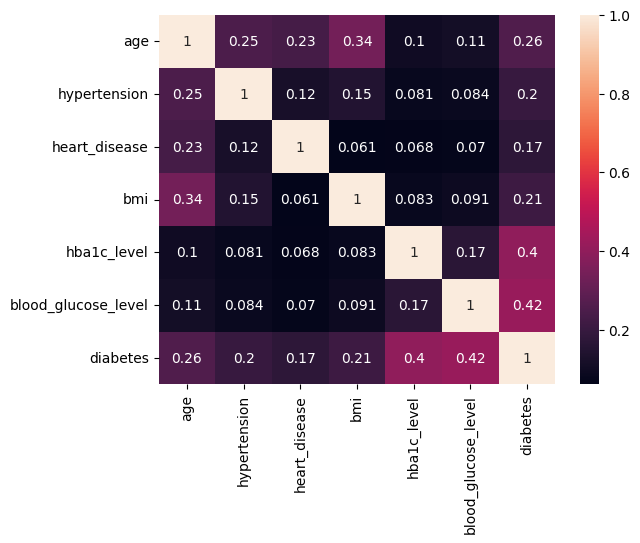

In [33]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [34]:
df['smoking_history'] = df['smoking_history'].replace(["no_info"], "never")

**Setting Up Validation Framework**

In [35]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=24)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=24)

In [36]:

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [37]:
y_train = df_train.diabetes.values
y_val = df_val.diabetes.values
y_test = df_test.diabetes.values


In [38]:
del df_train['diabetes']
del df_val['diabetes']
del df_test['diabetes']

**One Hot encoding**

In [39]:
train_dicts = df_train.to_dict(orient='records')

In [40]:
dv = DictVectorizer(sparse=False)

In [41]:
X_train = dv.fit_transform(train_dicts)

In [42]:
dv.get_feature_names_out()

array(['age', 'blood_glucose_level', 'bmi', 'gender=female',
       'gender=male', 'gender=other', 'hba1c_level', 'heart_disease',
       'hypertension', 'smoking_history=current', 'smoking_history=ever',
       'smoking_history=former', 'smoking_history=never',
       'smoking_history=not_current'], dtype=object)

In [43]:
val_dicts = df_val.to_dict(orient='records')

In [44]:
X_val = dv.transform(val_dicts)

# **Logistic Regression**

In [45]:
model = LogisticRegression(solver="liblinear",max_iter=1000,class_weight="balanced")
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [46]:
y_pred = model.predict_proba(X_val)[:,1]

In [47]:
diabetes_pred = (y_pred >= 0.5)

In [48]:
(y_val == diabetes_pred).mean()

0.88505

In [49]:
df_pred = pd.DataFrame()
df_pred['probablity'] = y_pred
df_pred['prediction'] = diabetes_pred.astype(int)
df_pred['actual'] = y_val


In [50]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [51]:
df_pred.correct.mean()

0.88505

In [52]:
score_global = {}
score_global['logistic_regression'] = roc_auc_score(y_val, y_pred)
score_global

{'logistic_regression': 0.9608279158821434}

In [53]:
thresholds = np.linspace(0,1,21)
scores = []
for t in thresholds:
  diabetes_decision = (y_pred >=t)
  score = accuracy_score(y_val, diabetes_decision)
  print('%.2f %.3f' %(t,score))
  scores.append(score)

0.00 0.086
0.05 0.565
0.10 0.661
0.15 0.717
0.20 0.760
0.25 0.789
0.30 0.814
0.35 0.835
0.40 0.852
0.45 0.870
0.50 0.885
0.55 0.897
0.60 0.910
0.65 0.921
0.70 0.931
0.75 0.940
0.80 0.948
0.85 0.953
0.90 0.958
0.95 0.956
1.00 0.914


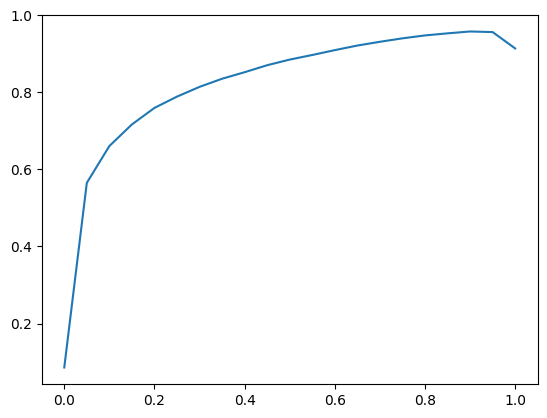

In [54]:
plt.plot(thresholds,scores)

In [55]:
def confusion_m(y_val,y_pred):
  actual_positive = (y_val == 1)
  print(actual_positive.sum())
  actual_negative = (y_val == 0)
  predict_positive = (y_pred >= 0.5)
  print(predict_positive.sum())
  predict_negative = (y_pred < 0.5)
  tp = (predict_positive & actual_positive).sum()
  tn = (predict_negative & actual_negative).sum()
  fp = (predict_positive&actual_negative).sum()
  fn = (predict_negative&actual_positive).sum()
  confusion_m = np.array([
    [tn,tp],
    [fn,fp]
])
  return confusion_m


In [56]:
m = confusion_m(y_val,y_pred)
print(m)
tn, tp = m[0]
fn, fp = m[1]


1720
3581
[[16200  1501]
 [  219  2080]]


In [57]:
fpr,tpr,thresholds = roc_curve(y_val,y_pred)


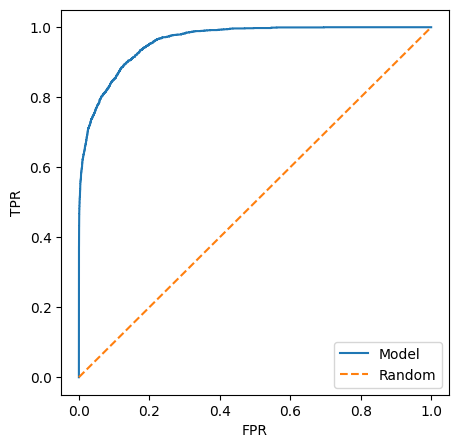

In [58]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,label="Model")
plt.plot([0,1],[0,1],label='Random', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [59]:
numerical = ["age","bmi","blood_glucose_level","hba1c_level"]

def train(df, y_train, C=1.0):
  dicts = df[categorical_column + numerical].to_dict(orient = 'records')
  dv = DictVectorizer(sparse=False)
  print()
  X_train = dv.fit_transform(dicts)
  model = LogisticRegression(C=C,solver="liblinear",max_iter=1000,class_weight="balanced")
  model.fit(X_train, y_train)
  return dv, model



In [60]:
def predict(df, dv, model):
  dicts = df[categorical_column + numerical].to_dict(orient = 'records')
  X = dv.transform(dicts)
  y_pred = model.predict_proba(X)[:,1]

  return y_pred

In [61]:
kfold = KFold(n_splits=10,shuffle=True, random_state=1)


In [62]:
for C in [0.0001, 0.001, 0.01, 0.1,0.5, 1,5,10]:
  kfold = KFold(n_splits=5,shuffle=True, random_state=1)
  scores_new = []
  for train_idx, val_idx in kfold.split(df_full_train):
    df_loc_train = df_full_train.iloc[train_idx]
    df_loc_val = df_full_train.iloc[val_idx]

    newy_train = df_loc_train.diabetes.values
    newy_val = df_loc_val.diabetes.values

    dv, model = train(df_loc_train,newy_train,C=C)
    newy_pred = predict(df_loc_val, dv, model)
    auc = roc_auc_score(newy_val, newy_pred)
    scores_new.append(auc)
  print('C=%s %.3f +- %.3f' % (C,np.mean(scores_new), np.std(scores_new)))






C=0.0001 0.791 +- 0.007





C=0.001 0.912 +- 0.002





C=0.01 0.958 +- 0.002





C=0.1 0.962 +- 0.002





C=0.5 0.962 +- 0.002





C=1 0.962 +- 0.002





C=5 0.962 +- 0.002





C=10 0.962 +- 0.002


In [63]:
scores_new

[0.9615480093240092,
 0.9615888151570108,
 0.9595871564670003,
 0.9650548827138337,
 0.9606447871990977]

# **Decision Tree Classifier**

In [64]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=24)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=24)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = df_train.diabetes.values
y_val = df_val.diabetes.values
y_test = df_test.diabetes.values
del df_train['diabetes']
del df_val['diabetes']
del df_test['diabetes']





In [65]:
dicts = df_train.to_dict(orient = 'records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts)
dt = DecisionTreeClassifier(max_depth=5,class_weight="balanced")
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [66]:

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [67]:
len(X_val),len(df_val),df_train.shape

(20000, 20000, (60000, 8))

In [68]:
y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val,y_pred)
print('val:',auc)
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred)
print('train:',auc)

val: 0.9612691784133123
train: 0.9612691784133123


# **Decision Tree Parameter Tuning**

In [69]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d,class_weight="balanced")
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (d, auc))

   1 -> 0.724
   2 -> 0.827
   3 -> 0.899
   4 -> 0.942
   5 -> 0.961
   6 -> 0.969
  10 -> 0.971
  15 -> 0.930
  20 -> 0.879
None -> 0.843


In [70]:
for m in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=m,class_weight="balanced")
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (m, auc))

1 -> 0.971
5 -> 0.971
10 -> 0.971
15 -> 0.971
20 -> 0.972
50 -> 0.974
100 -> 0.974
200 -> 0.974


In [71]:
for m in [5, 6, 10]:
    print('depth: %s' % m)

    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s,class_weight="balanced")
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (s, auc))

    print()

depth: 5
1 -> 0.961
5 -> 0.961
10 -> 0.961
15 -> 0.961
20 -> 0.961
50 -> 0.961
100 -> 0.961
200 -> 0.961

depth: 6
1 -> 0.969
5 -> 0.969
10 -> 0.969
15 -> 0.969
20 -> 0.969
50 -> 0.969
100 -> 0.969
200 -> 0.969

depth: 10
1 -> 0.971
5 -> 0.971
10 -> 0.971
15 -> 0.971
20 -> 0.972
50 -> 0.974
100 -> 0.974
200 -> 0.974



In [72]:
score_global
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5,class_weight="balanced")
dt.fit(X_train, y_train)

y_pred_dt = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred_dt)
score_global['decision_tree_classifier'] = auc
score_global

{'logistic_regression': 0.9608279158821434,
 'decision_tree_classifier': 0.9707873963157092}

# **Random Forest Classifier**

In [73]:
rf = RandomForestClassifier(n_estimators=10, random_state=1,class_weight="balanced")
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=10, random_state=1)

In [74]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.9262238403898021

In [75]:
scores= []
for n in range(10,201,10):
  rf = RandomForestClassifier(n_estimators=n, random_state=1)
  rf.fit(X_train,y_train)
  y_pred = rf.predict_proba(X_val)[:,1]
  auc = roc_auc_score(y_val,y_pred)
  scores.append((n,auc))



In [76]:
df_scores = pd.DataFrame(scores,columns=['n_estimators','auc'])


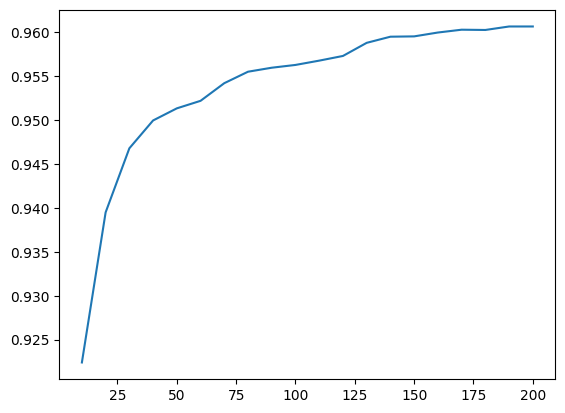

In [77]:
plt.plot(df_scores.n_estimators,df_scores.auc)

In [78]:
scores= []
for d in [5,10,15]:
  for n in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=n,max_depth=d, random_state=1,class_weight="balanced")
    rf.fit(X_train,y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    scores.append((d,n,auc))

In [79]:
df_scores = pd.DataFrame(scores,columns=['depth','n_estimators','auc'])
df_scores.head()

,depth,n_estimators,auc
0,5,10,0.959030
1,5,20,0.965074
2,5,30,0.968585
3,5,40,0.969212
4,5,50,0.970277


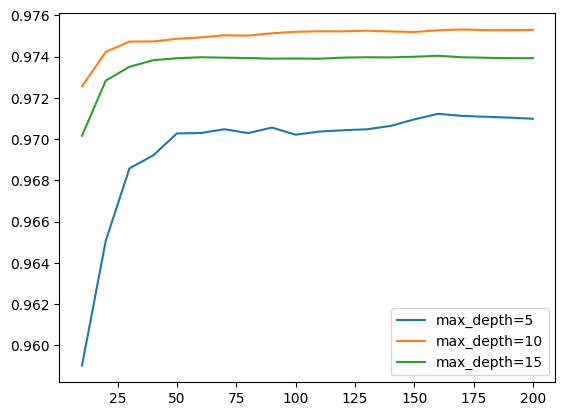

In [80]:
for d in [5,10,15]:
  df_subset = df_scores[df_scores.depth == d]
  plt.plot(df_subset.n_estimators,df_subset.auc,
           label='max_depth=%d' %d)
plt.legend()

In [81]:
max_d = 15
scores= []
for s in [1,3,5,10,15,50]:
  for n in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=n,
                                max_depth=max_d,
                                min_samples_leaf=s,
                                random_state=1)
    rf.fit(X_train,y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    scores.append((s,n,auc))

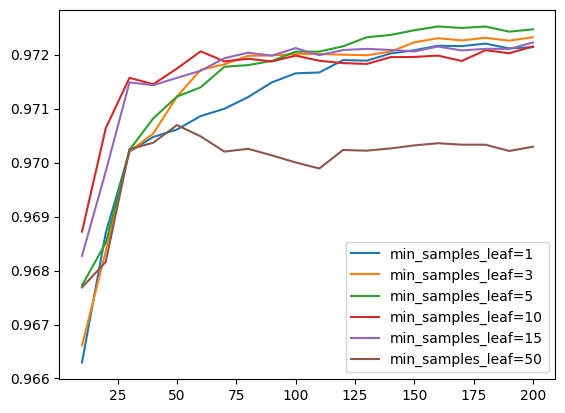

In [82]:
df_scores = pd.DataFrame(scores,columns=['min_samples_leaf','n_estimators','auc'])
for s in [1,3,5,10,15,50]:
  df_subset = df_scores[df_scores.min_samples_leaf == s]
  plt.plot(df_subset.n_estimators,df_subset.auc,
           label='min_samples_leaf=%d' %s)
plt.legend()

In [83]:
min_samples_leaf=10

In [84]:
rf = RandomForestClassifier(n_estimators=100,max_depth=15, min_samples_leaf=5,random_state=1,class_weight="balanced")
rf.fit(X_train,y_train)
y_pred = rf.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val,y_pred)
score_global['Random_forest_classifier'] = auc
score_global

{'logistic_regression': 0.9608279158821434,
 'decision_tree_classifier': 0.9707873963157092,
 'Random_forest_classifier': 0.975606489491629}

# **XG Boost**

In [85]:

# xgb.DMatrix(X_train,label=y_train, g=)
features = list(dv.get_feature_names_out())


dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)


In [86]:
xgb_final = xgb.XGBClassifier(scale_pos_weight=10.764,eta=0.08,max_depth=6,min_child_weight=3,
                              eval_metric="auc",
                             objective="binary:logistic",
                             seed = 1

)


xgb_final = xgb_final.fit(
                  X_train,y_train
                  )

In [87]:
xgb_params = {

              'eta': 0.08,
              'max_depth': 6,
              'min_child_weight': 3,
              'objective': 'binary:logistic',
              'seed': 1,
              'verbosity': 1,
               'scale_pos_weight': 10.764
}

model = xgb.train(xgb_params,dtrain, num_boost_round=20)

In [88]:
y_pred = model.predict(dval)

In [89]:

auc = roc_auc_score(y_val,y_pred)
score_global['xgb_boost'] = auc
score_global

{'logistic_regression': 0.9608279158821434,
 'decision_tree_classifier': 0.9707873963157092,
 'Random_forest_classifier': 0.975606489491629,
 'xgb_boost': 0.9751194754719861}

In [90]:
scores={}

In [91]:
watchlist = [(dtrain,'train'),(dval,'eval')]

In [92]:
%%capture output
# for eta in ['0.01',]
xgb_params = {

              'eta': 0.08,
              'max_depth': 10,
              'min_child_weight': 5,
              'eval_metric': 'auc',
              'objective': 'binary:logistic',
              'seed': 1,
              'verbosity': 1
}

model = xgb.train(xgb_params,
                  dtrain,
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=100)

In [93]:
def parse_xgb_output(output):
  res = []
  tree = []
  auc_train = []
  auc_val = []

  for line in output.stdout.strip().split('\n'):
    i_row, train_row,val_row = line.split('\t')
    i = int(i_row.strip('[]'))
    train = float(train_row.split(':')[1])
    val = float(val_row.split(':')[1])
    res.append((i,train,val))

  col = ['num_iter','train_auc','val_auc']
  df_results = pd.DataFrame(res,columns=col)

  return df_results





In [94]:
df_score = parse_xgb_output(output)

In [95]:

key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.08'

In [96]:

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [97]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=5'

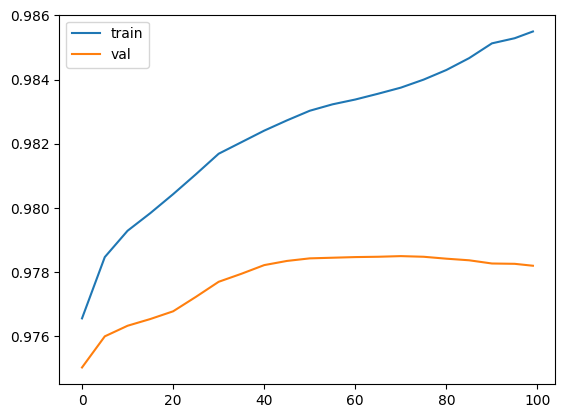

In [98]:
plt.plot(df_score.num_iter,df_score.train_auc, label='train')
plt.plot(df_score.num_iter,df_score.val_auc, label='val')
plt.legend()

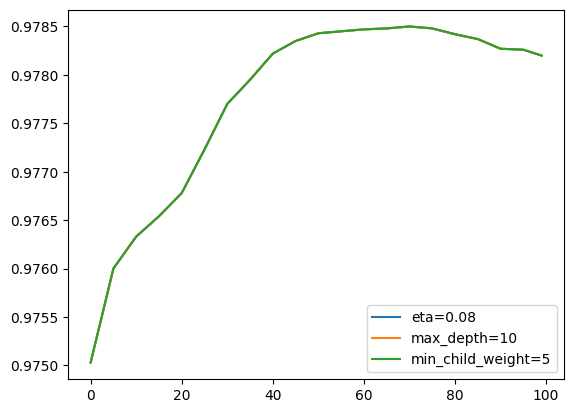

In [99]:
for key,df_scores in scores.items():

  # plt.plot(df_scores.num_iter,df_scores.train_auc, label=key)
  plt.plot(df_scores.num_iter,df_scores.val_auc, label=key)
plt.legend()

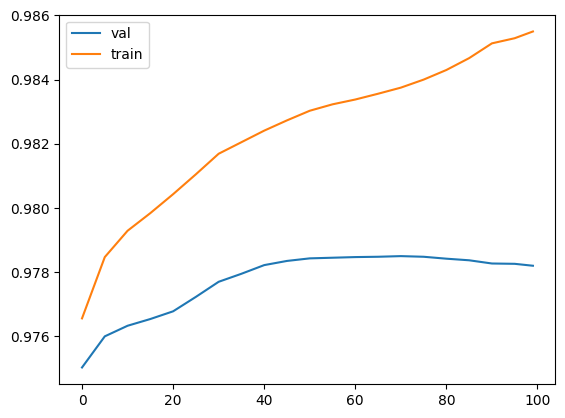

In [100]:
etas = ['eta=0.08']
for eta in etas:
  df_score = scores[eta]
  plt.plot(df_score.num_iter,df_score.val_auc, label='val')
  plt.plot(df_score.num_iter,df_score.train_auc, label='train')

plt.legend()


# **Selecting Final Model**

In [101]:
score_global

{'logistic_regression': 0.9608279158821434,
 'decision_tree_classifier': 0.9707873963157092,
 'Random_forest_classifier': 0.975606489491629,
 'xgb_boost': 0.9751194754719861}

In [102]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=24)

df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)




In [103]:
y_full_train = df_full_train.diabetes.values
y_test = df_test.diabetes.values
len(y_full_train),len(y_test),len(df_full_train),len(df_test)


(80000, 20000, 80000, 20000)

In [104]:
del df_full_train['diabetes']
del df_test['diabetes']


In [105]:

dict_train_full = df_full_train.fillna(0).to_dict(orient='records')
dict_test = df_test.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train_full = dv.fit_transform(dict_train_full)
X_test = dv.transform(dict_test)
features = list(dv.get_feature_names_out())




In [106]:
dtrain_full = xgb.DMatrix(X_train_full, label=y_full_train, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [107]:
xgb_final = xgb.XGBClassifier(scale_pos_weight=10.764,eta=0.08,max_depth=10,min_child_weight=3,
                              eval_metric="auc",
                             objective="binary:logistic",
                             seed = 1
)


xgb_final = xgb_final.fit(
                  X_train_full,y_full_train
                  )

In [108]:
rf = RandomForestClassifier(n_estimators=100,max_depth=15, min_samples_leaf=5,random_state=1,class_weight="balanced")
rf_final = rf.fit(X_train_full,y_full_train)

y_pred_rf = rf_final.predict_proba(X_test)[:, 1]

In [109]:
y_pred_xgb = xgb_final.predict(X_test)

In [110]:
print(roc_auc_score(y_test,y_pred_rf))
print(roc_auc_score(y_test,y_pred_xgb))

0.9757820135423165
0.9114628820960698


# **Saving The Model**

In [111]:
patient = {
    "gender":"male",
    "age":80.0,
    "hypertension": 0,
    "heart_disease": 0,
    "smoking_history": "ever",
    "bmi": 25.31,
    "HbA1c_level":7.0,
    "blood_glucose_level":220.0
}

X = dv.transform([patient])

print(X)

print(features)
predict = rf_final.predict(X)
print(rf.predict_proba(X))
predict_xgb = xgb_final.predict(X)
print((predict).round(5))
print((predict_xgb).round(5))


[[ 80.   220.    25.31   0.     1.     0.     0.     0.     0.     0.
    1.     0.     0.     0.  ]]
['age', 'blood_glucose_level', 'bmi', 'gender=female', 'gender=male', 'gender=other', 'hba1c_level', 'heart_disease', 'hypertension', 'smoking_history=current', 'smoking_history=ever', 'smoking_history=former', 'smoking_history=never', 'smoking_history=not_current']
[[0.34777596 0.65222404]]
[1]
[0]
